## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing

## Reading Data

In [2]:
df = pd.read_csv("train.csv")

df = df.iloc[0:50000]

In [3]:
# Duplicating the dataframe for modelling and visualization
dfml = df.copy()

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.000000e+04,50000.000000,50000.000000,50000.000000,34279.000000,15183.000000,50000.000000
mean,1.002553e+06,8.143420,0.409760,5.304600,9.869308,12.709478,9278.543340
std,1.787739e+03,6.587752,0.491794,3.718432,5.066454,4.122255,4953.748142
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001015e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5852.000000
50%,1.002103e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8045.000000
75%,1.004072e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12033.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     50000 non-null  int64  
 1   Product_ID                  50000 non-null  object 
 2   Gender                      50000 non-null  object 
 3   Age                         50000 non-null  object 
 4   Occupation                  50000 non-null  int64  
 5   City_Category               50000 non-null  object 
 6   Stay_In_Current_City_Years  50000 non-null  object 
 7   Marital_Status              50000 non-null  int64  
 8   Product_Category_1          50000 non-null  int64  
 9   Product_Category_2          34279 non-null  float64
 10  Product_Category_3          15183 non-null  float64
 11  Purchase                    50000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.6+ MB


In [8]:
df.shape

(50000, 12)

## Data Preprocessing

In [9]:
df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,True,False
49998,False,False,False,False,False,False,False,False,False,True,True,False


In [10]:
df.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            15721
Product_Category_3            34817
Purchase                          0
dtype: int64

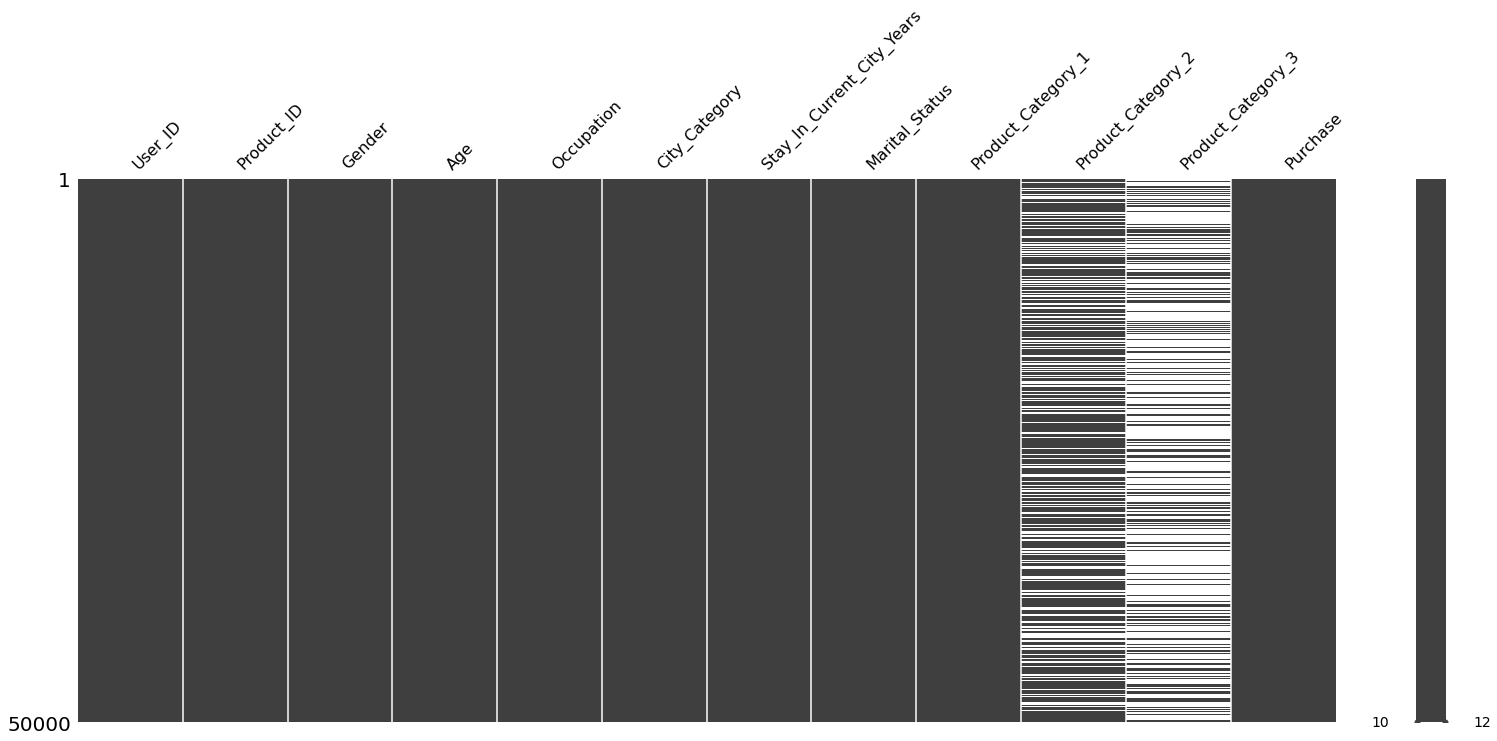

In [11]:
msno.matrix(df)

In [12]:
# Replace NAN with 0
df['Product_Category_2']=df['Product_Category_2'].fillna('0')
df.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Product_Category_3            34817
Purchase                          0
dtype: int64

In [13]:
# Replace NAN with 0
df['Product_Category_3']=df['Product_Category_3'].fillna('0')
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2            object
Product_Category_3            object
Purchase                       int64
dtype: object

In [15]:
df['Product_Category_2']=df['Product_Category_2'].astype(int)
df['Product_Category_3']=df['Product_Category_3'].astype(int)

In [16]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int32
Product_Category_3             int32
Purchase                       int64
dtype: object

In [17]:
# Printing Unique values from each column
for col in df:
    print(str(df[col].name) + ":-")
    print(df[col].unique())
    print("-"*50)

User_ID:-
[1000001 1000002 1000003 ... 1001621 1001633 1001638]
--------------------------------------------------
Product_ID:-
['P00069042' 'P00248942' 'P00087842' ... 'P00366742' 'P00144342'
 'P00345542']
--------------------------------------------------
Gender:-
['F' 'M']
--------------------------------------------------
Age:-
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
--------------------------------------------------
Occupation:-
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
--------------------------------------------------
City_Category:-
['A' 'C' 'B']
--------------------------------------------------
Stay_In_Current_City_Years:-
['2' '4+' '3' '1' '0']
--------------------------------------------------
Marital_Status:-
[0 1]
--------------------------------------------------
Product_Category_1:-
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
--------------------------------------------------
Product_Category_2:-
[ 0  6 14  2  8 15 16 11

In [18]:
# Encoding the Age column
df['Age']=df['Age'].map({'0-17':'Teenager','18-25':'Adult','26-35':'Adult','36-45':'Adult','46-50':'Adult','51-55':'Old','55+':'Old'})
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,Teenager,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,Teenager,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,Teenager,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,Teenager,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,Old,16,C,4+,0,8,0,0,7969
5,1000003,P00193542,M,Adult,15,A,3,0,1,2,0,15227
6,1000004,P00184942,M,Adult,7,B,2,1,1,8,17,19215
7,1000004,P00346142,M,Adult,7,B,2,1,1,15,0,15854
8,1000004,P0097242,M,Adult,7,B,2,1,1,16,0,15686
9,1000005,P00274942,M,Adult,20,A,1,1,8,0,0,7871


In [19]:
df['Age']=df['Age'].astype(str).apply(lambda x : x.replace('+','-'))
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,Teenager,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,Teenager,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,Teenager,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,Teenager,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,Old,16,C,4+,0,8,0,0,7969


In [20]:
 # Removing '+' from Stay_In_Current_City_Years column
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(str).apply(lambda x : x.replace('+',''))
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,Teenager,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,Teenager,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,Teenager,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,Teenager,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,Old,16,C,4,0,8,0,0,7969


In [21]:
 # Setting up 1 for M and 0 for F in Gender column
df['Gender']=df['Gender'].map({'M':1,'F':0})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,Teenager,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,Teenager,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,Teenager,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,Teenager,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,Old,16,C,4,0,8,0,0,7969


## Data Visualization

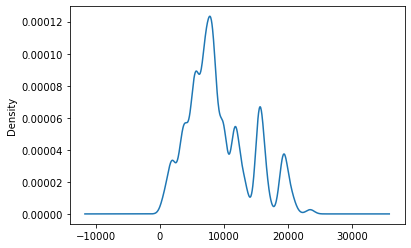

In [22]:
# Purchase Distribution
df['Purchase'].plot.kde()

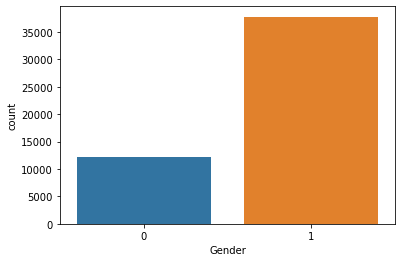

In [23]:
# Gender vs Count (M and F)
sns.countplot(x='Gender',data=df)

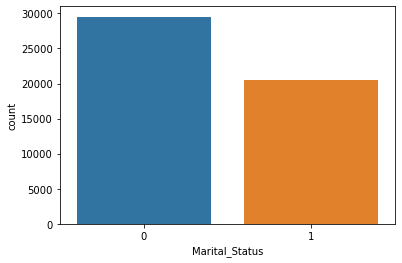

In [24]:
# Marital Status vs Count
sns.countplot(x='Marital_Status',data=df)

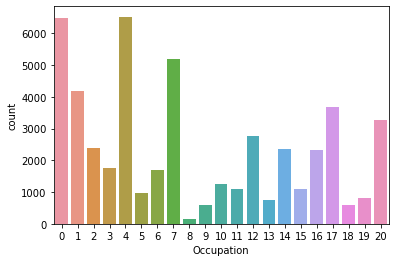

In [25]:
# Count of each Occupation 
sns.countplot(x='Occupation',data=df)

In [26]:
# Sorted Count of Occupation grouped with purchase 
op=df.groupby('Occupation')['Purchase'].count()
op

Occupation
0     6476
1     4192
2     2398
3     1769
4     6528
5      964
6     1706
7     5180
8      165
9      583
10    1262
11    1088
12    2777
13     745
14    2361
15    1106
16    2320
17    3685
18     608
19     809
20    3278
Name: Purchase, dtype: int64

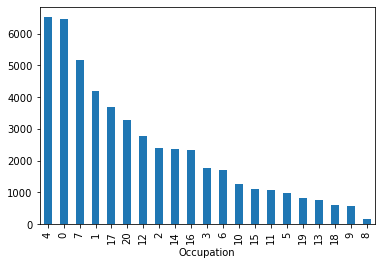

In [27]:
op.nlargest(21).plot(kind='bar')

In [28]:
# Sorted Count of City_Category grouped with purchase 
pc=df.groupby('City_Category')['Purchase'].count()
pc

City_Category
A    14049
B    20721
C    15230
Name: Purchase, dtype: int64

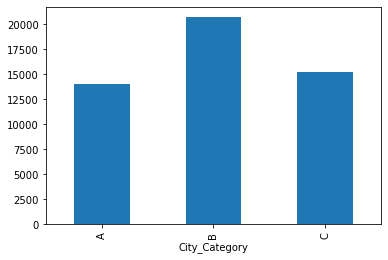

In [29]:
pc.plot(kind='bar')

In [30]:
# Sorted Count of Age grouped with purchase 
pa=df.groupby('Age')['Purchase'].count()
pa

Age
Adult       43199
Old          5392
Teenager     1409
Name: Purchase, dtype: int64

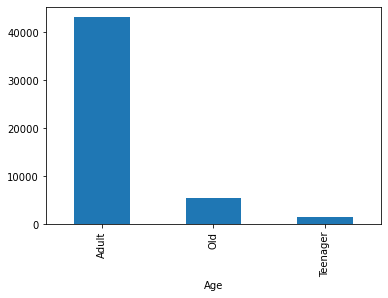

In [31]:
pa.plot(kind='bar')

In [32]:
# Sorted Count of Product_Category_1 grouped with purchase 
pp1=df.groupby('Product_Category_1')['Purchase'].count()
pp1

Product_Category_1
1     12651
2      2184
3      1827
4      1059
5     14082
6      1827
7       337
8     10519
9        38
10      460
11     2299
12      348
13      470
14      152
15      564
16      867
17       54
18      262
Name: Purchase, dtype: int64

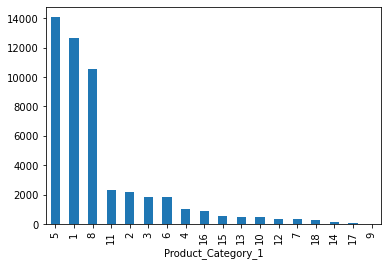

In [39]:
pp1.nlargest(19).plot(kind='bar')

In [40]:
# Sorted Count of Product_Category_2 grouped with purchase 
pp2=df.groupby('Product_Category_2')['Purchase'].count()
pp2

Product_Category_2
0     15721
2      4389
3       265
4      2317
5      2363
6      1517
7        53
8      5861
9       553
10      278
11     1281
12      535
13      978
14     5115
15     3403
16     3900
17     1222
18      249
Name: Purchase, dtype: int64

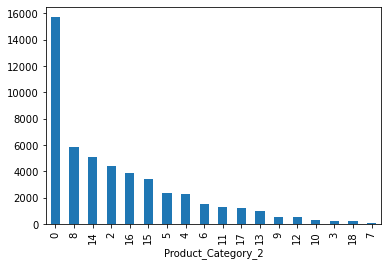

In [42]:
# 0 must be ignored as it is replacement of NANs
pp2.nlargest(19).plot(kind='bar')

In [43]:
# Sorted Count of Product_Category_3 grouped with purchase 
pp3=df.groupby('Product_Category_3')['Purchase'].count()
pp3

Product_Category_3
0     34817
3        61
4       181
5      1497
6       437
8      1091
9      1052
10      144
11      163
12      860
13      488
14     1675
15     2515
16     3033
17     1590
18      396
Name: Purchase, dtype: int64

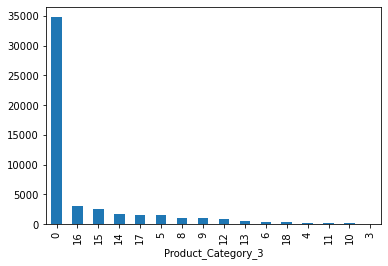

In [44]:
# 0 must be ignored as it is replacement of NANs
pp3.nlargest(19).plot(kind='bar')

## Machine Learning Models

In [45]:
dfml.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [46]:
# Encoding the data dfml
dfml['Gender']=pd.factorize(dfml.Gender)[0]
dfml['Age']=pd.factorize(dfml.Age)[0]
dfml['City_Category']=pd.factorize(dfml.City_Category)[0]
dfml['Stay_In_Current_City_Years']=pd.factorize(dfml.Stay_In_Current_City_Years)[0]
dfml['Product_ID']=pd.factorize(dfml.Product_ID)[0]
dfml['User_ID']=pd.factorize(dfml.User_ID)[0]


dfml['Product_Category_1']=pd.factorize(dfml.Product_Category_1)[0]
dfml['Product_Category_2']=pd.factorize(dfml.Product_Category_2)[0]
dfml['Product_Category_3']=pd.factorize(dfml.Product_Category_3)[0]

In [48]:
dfml.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0,10,0,0,0,0,-1,-1,8370
1,0,1,0,0,10,0,0,0,1,0,0,15200
2,0,2,0,0,10,0,0,0,2,-1,-1,1422
3,0,3,0,0,10,0,0,0,2,1,-1,1057
4,1,4,1,1,16,1,1,0,3,-1,-1,7969
5,2,5,1,2,15,0,2,0,1,2,-1,15227
6,3,6,1,3,7,2,0,1,1,3,1,19215
7,3,7,1,3,7,2,0,1,1,4,-1,15854
8,3,8,1,3,7,2,0,1,1,5,-1,15686
9,4,9,1,2,20,0,3,1,3,-1,-1,7871


In [49]:
# Correlation matrix
dfml.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,0.052414,-0.036656,-0.043434,-0.029680,0.049732,0.000056,0.017819,0.007160,0.013711,0.006403,0.006622
Product_ID,0.052414,1.000000,-0.015835,-0.005929,0.003608,-0.018146,0.005698,0.010874,0.193774,-0.046022,-0.159452,-0.208977
Gender,-0.036656,-0.015835,1.000000,0.005439,0.113611,-0.010448,-0.024551,-0.008889,-0.005152,0.020598,0.035745,0.063253
Age,-0.043434,-0.005929,0.005439,1.000000,-0.038528,0.040553,-0.002755,-0.067004,-0.004837,0.002630,0.013589,0.000108
Occupation,-0.029680,0.003608,0.113611,-0.038528,1.000000,0.008317,-0.013365,0.008665,0.005960,0.007662,0.013273,0.013478
City_Category,0.049732,-0.018146,-0.010448,0.040553,0.008317,1.000000,-0.022188,0.028659,-0.010052,0.010607,0.021915,0.022096
Stay_In_Current_City_Years,0.000056,0.005698,-0.024551,-0.002755,-0.013365,-0.022188,1.000000,-0.004844,0.008440,-0.009738,-0.007944,-0.010994
Marital_Status,0.017819,0.010874,-0.008889,-0.067004,0.008665,0.028659,-0.004844,1.000000,0.014095,0.005051,-0.017592,0.002647
Product_Category_1,0.007160,0.193774,-0.005152,-0.004837,0.005960,-0.010052,0.008440,0.014095,1.000000,-0.080561,-0.221542,-0.082217
Product_Category_2,0.013711,-0.046022,0.020598,0.002630,0.007662,0.010607,-0.009738,0.005051,-0.080561,1.000000,0.236003,0.121809


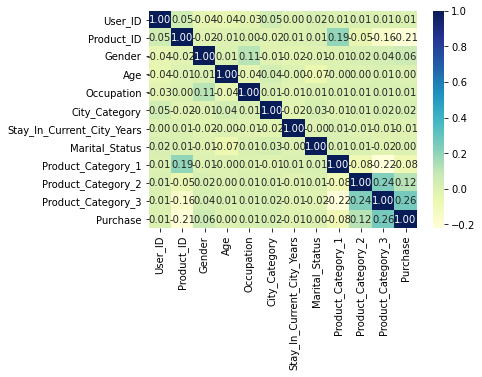

In [50]:
# Correlation matrix graph
sns.heatmap(dfml.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

### Splitting the dataset in train and test dataset

In [51]:
X= dfml.values[:,0:11]
Y= dfml.values[:, 11]

In [52]:
X= preprocessing.scale(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100)

### Decision Tree Regressor

In [54]:
dtreg = DecisionTreeRegressor(max_depth=5)
dtreg.fit(X_train, y_train)

dt_pred = dtreg.predict(X_test)

dtscore=r2_score(y_test, dt_pred)
dtscore*100

60.622781412422945

### Linear Regression

In [55]:
lrreg = LinearRegression()
lrreg.fit(X_train, y_train)

lr_pred = lrreg.predict(X_test)

lrscore=r2_score(y_test, lr_pred)
lrscore*100

9.735664501653485

### Random  forest Regressor

In [56]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

rfscore=r2_score(y_test, rf_pred)
rfscore*100

66.78581833217073

### XGB Regressor

In [57]:
xgbreg=xgb.XGBRegressor(eval_metric='rmsle')
xgbreg.fit(X_train, y_train)

xgb_pred = xgbreg.predict(X_test)

xgbscore=r2_score(y_test, xgb_pred)
xgbscore*100

68.74816218771024